## Тестовое задание на должность продуктового аналитика (junior)

### Задание 1

Вы работаете junior аналитиком в компании, создающей мобильные игры. Вам необходимо проанализировать данные, содержащие информацию об игроке, - его уровень, страна, платформа, дата регистрации и дата login’a. Эти данные помогут сформулировать представление об аудитории игры.

Датасет:
https://docs.google.com/spreadsheets/d/1bb0mBd9OGSdH08POkWgcYlK9a2YPQq1Dd2XyikUdeeI/edit#gid=1478114822

Таблица содержит следующие столбцы:
- сountry - страна,
- pl - уровень игрока,
- plf - платформа, 
- reg - дата регистрации игрока, 
- ts - время последнего захода игрока в игру, 
- user - id игрока.

#### Вопросы:
1. Для каждой платформы определите топ 5 стран по количеству игроков. 
2. Какой максимальный lifetime у игроков в игре?
3. Какое количество игроков находится выше 20 уровня? 
4. Посчитайте средний уровень игроков для каждой страны.

#### Как выполнять задание:
- Результаты можете предоставить в виде тетрадки Jupyter Notebook (предпочтительно) или в Google spreadsheets (для каждого вопроса отдельный лист).
- Опишите короткий вывод по каждому решению.


In [869]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)})

In [870]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1bb0mBd9OGSdH08POkWgcYlK9a2YPQq1Dd2XyikUdeeI/edit#gid=1478114822'

In [871]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [872]:
df = pd.read_csv(csv_export_url)

In [873]:
df

,country,pl,plf,reg,ts,user
0,IT,33,Android,1511191920859,1586044805457,1122239prod-eu
1,IN,33,Android,1509074590554,1586045807421,147065prod-us
2,TR,33,iOS,1575420775882,1586047059117,25564086prod-eu
3,HK,12,Android,1584406076183,1586045087568,10123050prod-as
4,CN,21,Android,1581887511291,1586046421744,9893956prod-as
...,...,...,...,...,...,...
995,RU,33,Android,1513267177504,1586045138765,6341315prod-eu
996,IN,22,Android,1520572103159,1586046439435,6435529prod-in
997,PH,33,Android,1522947532060,1586045640689,7162127prod-in
998,CN,33,iOS,1557976508308,1586047020945,7167775prod-as


#### 1. Для каждой платформы определите топ 5 стран по количеству игроков.

In [874]:
top_5_countries = df.groupby(['plf', 'country']) \
                    .agg({'user': 'count'}) \
                    .rename(columns={'user': 'number_of_users'}) \
                    .sort_values(['plf', 'number_of_users'], ascending=False)

In [875]:
top_5_countries.reset_index()
top_5_countries.groupby('plf').head()

number_of_users
plf     country                 
iOS     CN                   122
        VN                    18
        US                    14
        RU                    12
        IN                    11
Samsung EG                     3
        BR                     1
        CR                     1
        IL                     1
        IN                     1
Android IN                   151
        RU                    59
        CN                    58
        ID                    36
        PH                    30
Amazon  CI                     1
        US                     1

#### Вывод:
- Самые популярные платформы - Android и iOS. 
- Наибольшее количество игроков находится в странах: Китай, Индия, Россия, Индонезия, США. В целом результат корреллирует с данными о численности населения.
- Предположу, что большое число игроков из России обусловлено созданием интерфейса на русском языке.


#### 2. Какой максимальный lifetime у игроков в игре?

In [876]:
df['lifetime_days'] = ((df.ts - df.reg) / 86400000).round(0)

In [877]:
lifetime = df.sort_values('lifetime_days', ascending=False)

In [878]:
lifetime = lifetime.groupby('lifetime_days', as_index=False) \
                   .agg({'user': 'count'}) \
                   .rename(columns={'user': 'number_of_users'}) \
                   .sort_values('lifetime_days', ascending=False)

In [879]:
lifetime

,lifetime_days,number_of_users
334,891.0,1
333,890.0,1
332,871.0,1
331,870.0,1
330,869.0,5
...,...,...
4,4.0,19
3,3.0,34
2,2.0,36
1,1.0,81


<AxesSubplot:xlabel='lifetime_days', ylabel='number_of_users'>

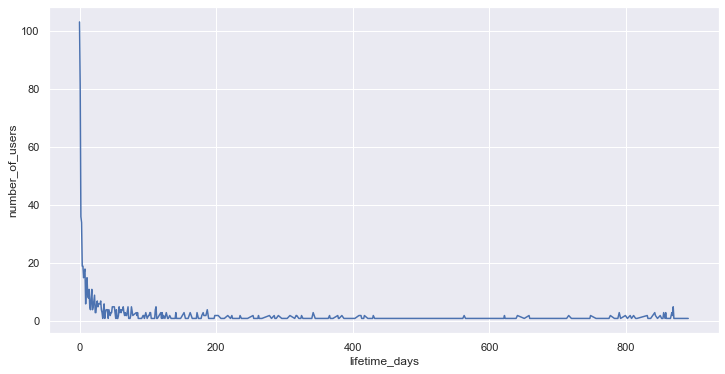

In [880]:
sns.lineplot(x = 'lifetime_days', y = 'number_of_users', data=lifetime)

#### Вывод:
- Максимальный lifetime у игроков не превышает 891 день. Можно предположить, что это те игроки, которые начали играть сразу после релиза.
- Самый большой отток (Churn) происходит в первые дни.

#### 3. Какое количество игроков находится выше 20 уровня?

In [881]:
df.query('pl > 20').shape[0]

250

#### Вывод:
В выборке 1000 игроков, ровно четверть выше 20 уровня

#### 4. Посчитайте средний уровень игроков для каждой страны.

In [888]:
# Создадим список стран, в которых игроков 10 и больше. Остальные страны исключим из расчета.
countries = df.groupby('country', as_index=False) \
              .agg({'user': 'count'}) \
              .query('user >= 10') \
              .sort_values('user', ascending=False)

In [889]:
countries = countries.country.to_list()

In [890]:
mean_pl = df.groupby('country', as_index=False) \
            .agg({'pl': 'mean'}) \
            .rename(columns={'pl': 'mean_pl'}) \
            .round(1)

In [891]:
mean_pl = mean_pl.loc[mean_pl['country'].isin(countries)] \
                 .sort_values('mean_pl', ascending=False)

In [892]:
mean_pl

,country,mean_pl
35,HK,20.4
23,DE,20.1
97,VN,17.0
85,TH,15.0
19,CN,14.8
61,MY,14.7
89,TR,14.7
78,RU,14.1
96,UZ,13.5
37,ID,13.3


<AxesSubplot:xlabel='country', ylabel='mean_pl'>

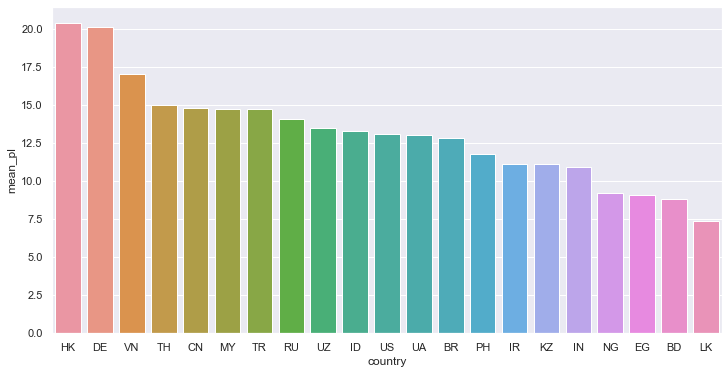

In [894]:
sns.barplot(x = 'country', y = 'mean_pl', data=mean_pl)

In [895]:
mean_pl.describe()

,mean_pl
count,21.000000
mean,13.138095
std,3.369789
min,7.400000
25%,11.100000
50%,13.100000
75%,14.700000
max,20.400000


#### Вывод:
- При расчете среднего уровня мы не учитываем страны, в которых игроков меньше 10, чтобы не допустить выбросов. После исключения осталась 21 страна.
- Средний уровень по всем странам - 13.1. Минимальный - у Шри-Ланки (7.4), максимальный - у Гонконга (20.4)

### Задание 2
Вы попали на аналитическую конференцию. В ней приняли участие 80 специалистов: 40 продуктовых аналитиков и 40 ML-инженеров. 30 продуктовых аналитиков и 20 ML-инженеров пойдут на лекцию, посвященную архитектуре баз данных. Известно, что случайно выбранный продуктовый аналитик пойдет на лекцию по архитектуре баз данных с вероятностью 75%. Какова вероятность того, что случайно выбранный посетитель лекции, посвященной архитектуре баз данных, окажется ML-инженером? 

#### Решение:
Применим формулу p = n/m, где  
m = 30 + 20 = 50 - всего посетителей лекции по архитектуре БД  
n = 20 - количество ML-инженеров, посетивших лекцию  
p = 20/50 = 0.4 или 40%

#### Ответ: 
40 % - вероятность того, что случайно выбранный посетитель лекции, посвященной архитектуре баз данных, окажется ML-инженером


### Задание 3
Есть поверье, что если спортсмен побывал на обложке  “Sports illustrated”, то вскоре после этого с этим спортсменом случается спортивная неудача или снижение спортивного результата. Одной жертвой “проклятья”  в 2000 году стал русский гимнаст Иван Иванков, которого назвали лучшим спорстменом мира, после чего он не смог даже отобраться на летние Олимпийские игры.
Действительно “Sports illustrated” является носителем проклятья или это можно объяснить каким-либо феноменом?

#### Ответ:

Обычно спортсмены появляются на обложке “Sports illustrated” после того как добъются выдающихся успехов. Пройдя пик физической формы, их результаты становятся ближе к средним. Это явление называется возвратом к среднему или регрессией к среднему. Т.е. если наблюдение является экстремальным, то будущие наблюдения будут ближе к долгосрочному среднему значению.
